This notebook requires the data from Perich et al. 2018 (Chewie / Mihili),
pre-processed and aligned to go cue using the following script:
`./scripts/chewie/extract_data.py`

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from plot_helpers import plot_directions, plot_directions_per_epoch, \
                            plot_beh_pred_per_epoch, get_trials2plot

%load_ext nb_black

Matplotlib created a temporary cache directory at /tmp/matplotlib-afdr1tvs because the default path (/afs/inf.ed.ac.uk/user/n/nkudryas/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<IPython.core.display.Javascript object>

In [23]:
area = 'M1'
path = f'../../datasets/Chewie_CO_FF_2016-10-07_session_vel_{area}_spikes_go.h5'
data = h5py.File(path, 'r')
data.keys()

<KeysViewHDF5 ['train_behavior', 'train_encod_data', 'train_epoch', 'train_inds', 'train_pos', 'train_recon_data', 'train_target_direction', 'train_vel', 'valid_behavior', 'valid_encod_data', 'valid_epoch', 'valid_inds', 'valid_pos', 'valid_recon_data', 'valid_target_direction', 'valid_vel']>

<IPython.core.display.Javascript object>

In [24]:
dset='train'
vel = data[f'{dset}_behavior'][:]
target_direction = data[f'{dset}_target_direction'][:]
epoch = data[f'{dset}_epoch'][:]
spike_data = data[f'{dset}_recon_data'][:]

dset='valid'
vel = np.concatenate([vel,data[f'{dset}_behavior'][:]])
target_direction = np.concatenate([target_direction,data[f'{dset}_target_direction'][:]])
epoch = np.concatenate([epoch,data[f'{dset}_epoch'][:]])
spike_data = np.concatenate([spike_data,data[f'{dset}_recon_data'][:]])

pos = np.cumsum(vel*0.01,1)

<IPython.core.display.Javascript object>

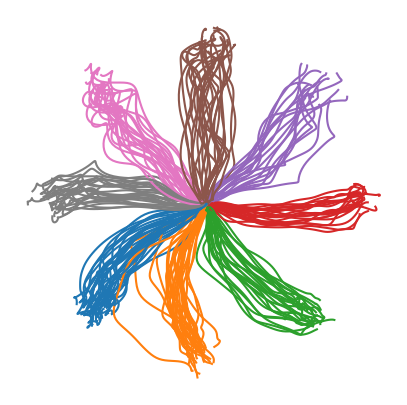

<IPython.core.display.Javascript object>

In [25]:
plot_directions(pos,target_direction,epoch==1,'figs/Figure3_AD')

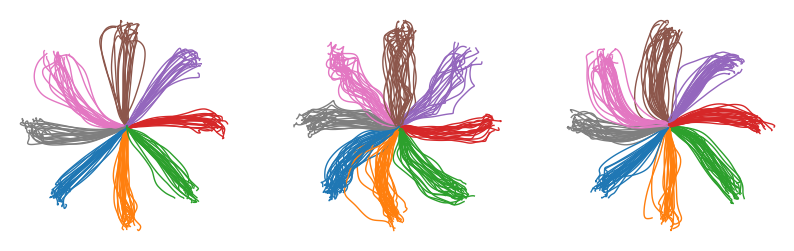

<IPython.core.display.Javascript object>

In [6]:
plot_directions_per_epoch(pos,target_direction,epoch,dataset_name='figs/Figure3_pos_per_epoch')

In [7]:
dir_index = np.array([
        sorted(set(target_direction)).index(i) for i in target_direction
    ])
avg_pos = np.empty_like(pos)
avg_vel = np.empty_like(vel)

avg_pos_per_epoch = np.empty_like(pos)
avg_vel_per_epoch = np.empty_like(vel)

for d in range(8):
    mask = d==dir_index
    avg_pos[mask] = pos[mask].mean(0)
    avg_vel[mask] = vel[mask].mean(0)
    for e in [0,1,2]:
        mask = (d==dir_index) & (e==epoch)
        avg_pos_per_epoch[mask] = pos[mask].mean(0)
        avg_vel_per_epoch[mask] = vel[mask].mean(0)


<IPython.core.display.Javascript object>

[0.90819029 0.84724069 0.90856924]


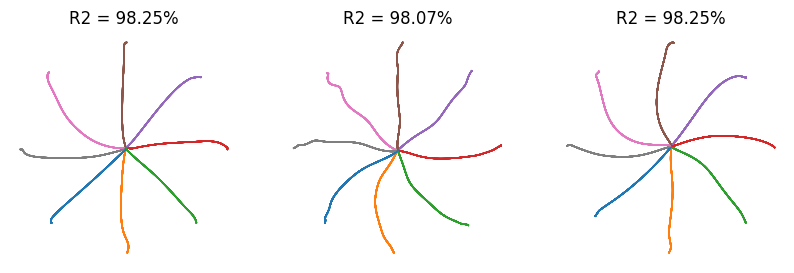

<IPython.core.display.Javascript object>

In [8]:

R2_pos = np.empty(3)
R2_vel = np.empty(3)
for e in [0,1,2]:
    mask = e==epoch
    R2_pos[e]   = 1 - np.sum((pos[mask] - avg_pos_per_epoch[mask])**2) / np.sum((pos[mask] - pos[mask].mean())**2)
    R2_vel[e] = 1 - np.sum((vel[mask] - avg_vel_per_epoch[mask])**2) / np.sum((vel[mask] - vel[mask].mean())**2)
    
print(R2_vel)
# plot_directions(np.cumsum(avg_vel,1),target_direction,epoch==1,'')
plot_directions_per_epoch(avg_pos_per_epoch,target_direction,epoch,R2_pos,'figs/Figure3_avg_pos_per_epoch')

In [9]:
trials2plot = np.array([get_trials2plot(vel, avg_vel, dir_index, epoch, i) for i in range(3)]).sum(0)
trials2plot.sum()

24

<IPython.core.display.Javascript object>

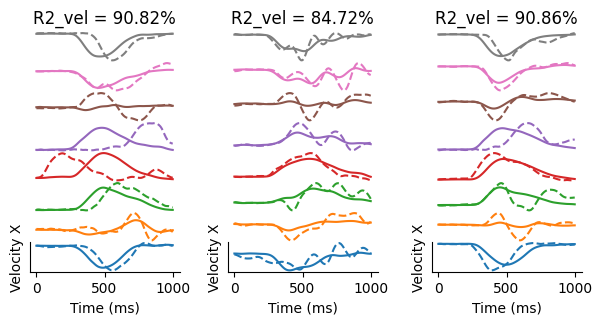

<IPython.core.display.Javascript object>

In [10]:
plot_beh_pred_per_epoch(vel, avg_vel_per_epoch, dir_index, trials2plot, epoch,component=0, file_name="figs/Figure3_vel")

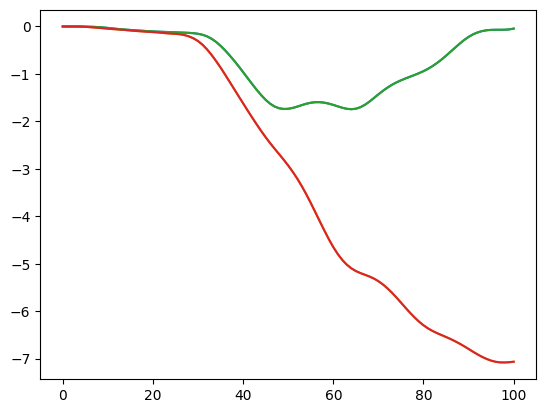

<IPython.core.display.Javascript object>

In [11]:
plt.plot(pos[1])
plt.plot(np.cumsum(vel[1]*0.01,0))

In [12]:
R2_iso_pos   = 1 - np.sum((pos - avg_pos)**2) / np.sum((pos - pos.mean())**2)
R2_aniso_pos = np.mean(1 - (((pos - avg_pos)**2).sum(0).sum(0)) / (((pos - pos.mean(0).mean(0))**2).sum(0).sum(0)))
print(R2_iso_pos, R2_aniso_pos)

0.9737183060234244 0.973627109075504


<IPython.core.display.Javascript object>

In [13]:
for e in [0,1,2]:
    mask = e==epoch
    R2_iso_pos   = 1 - np.sum((pos[mask] - avg_pos_per_epoch[mask])**2) / np.sum((pos[mask] - pos[mask].mean())**2)
    

<IPython.core.display.Javascript object>

In [14]:
R2_iso_vel   = 1 - np.sum((vel - avg_vel)**2) / np.sum((vel - vel.mean())**2)
R2_aniso_vel = np.mean(1 - (((vel - avg_vel)**2).sum(0).sum(0)) / (((vel - vel.mean(0).mean(0))**2).sum(0).sum(0)))
print(R2_iso_vel, R2_aniso_vel)

0.8448196010354541 0.8447463822855183


<IPython.core.display.Javascript object>